# Whole Human Brain 10x RNA-seq clustering analysis and annotation (CCN20230722)

The Whole Human Brain Atlas data 10X RNA-seq dataset contains ~3 million nuclei (more than 2 million sequenced neurons and almost 1 million non-neurons) from 100 locations across the forebrain, midbrain, and hindbrain. The integrated transcriptomic taxonomy contains 31 superclusters, 461 clusters, and 3313 subclusters. Full details of the dataset can be found in [Siletti et al. 2023](https://www.science.org/doi/10.1126/science.add7046)

The purpose of this notebook is to provide an overview of how cluster and cluster annotation information is represented through example use cases. Note that **cluster** in this notebook is an overloaded term as one of the levels is referred to as **cluster** while it can also refer to the general clustering of similar cells.

You need to be connected to the internet to run this notebook and that you have already downloaded the data via the getting started notebook.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

We will interact with the data using the **AbcProjectCache**. This cache object tracks which data has been downloaded and serves the path to the requsted data on disk. For metadata, the cache can also directly serve a up a Pandas Dataframe. See the ``getting_started`` notebook for more details on using the cache including installing it if it has not already been.

**Change the download_base variable to where you have downloaded the data in your system.**

In [2]:
download_base = Path('../../abc_download_root')
abc_cache = AbcProjectCache.from_s3_cache(download_base)
abc_cache.current_manifest

'releases/20240330/manifest.json'

## Data Overview

Below we list the available metadata in the WHB-taxonomy directory.

In [3]:
abc_cache.list_metadata_files('WHB-taxonomy')

['cluster',
 'cluster_annotation_term',
 'cluster_annotation_term_set',
 'cluster_to_cluster_annotation_membership']

### Subclusters
Each of the final set of 3313 subclusters is associated with an alias and label. Each row of the dataframe represents a ***subcluster*** as defined in Siletti et al. 2023. Each *subcluster* has a *label* (string that is unique in the database), *cluster alias* (in this case a simple integer) and the *number of cells* that has been grouped into the cluster.

In [4]:
cluster = abc_cache.get_metadata_dataframe(directory='WHB-taxonomy', file_name='cluster')
print(len(cluster))
cluster

cluster.csv: 100%|██████████| 84.8k/84.8k [00:00<00:00, 520kMB/s] 

3313


,cluster_alias,number_of_cells,label
0,0,34,CS202210140_494
1,1,220,CS202210140_495
2,2,187,CS202210140_496
3,3,246,CS202210140_497
4,4,188,CS202210140_498
...,...,...,...
3308,3308,140,CS202210140_3802
3309,3309,138,CS202210140_3803
3310,3310,85,CS202210140_3804
3311,3311,93,CS202210140_3805


### Cluster annotation term sets
Each level of classification is represented as a ***cluster annotation term set***. Each term set consists of a set of ordered terms. Each term set has a *label* (human readable string that is unique in the database), a *name*, *description* and *order* among the term sets.

In [5]:
term_set = abc_cache.get_metadata_dataframe(directory='WHB-taxonomy', file_name='cluster_annotation_term_set')
term_set

cluster_annotation_term_set.csv: 100%|██████████| 1.33k/1.33k [00:00<00:00, 16.2kMB/s]


,label,name,description,order
0,CCN202210140_SUBC,subcluster,The finest level of cell type definition in th...,2
1,CCN202210140_CLUS,cluster,An intermediate level of cell type definitions...,1
2,CCN202210140_SUPC,supercluster,The top level of cell type definition in the h...,0
3,CCN202210140_NEUR,neurotransmitter,Neurotransmitter terms are assigned to cluster...,3


We can use the pandas iterrows function to print out the description for each term set.

In [6]:
# print out description for each term_set
for tsindex, tsrow in term_set.iterrows():
    print("%s:\n" % tsrow['name'])
    print("%s\n" % tsrow['description'])

subcluster:

The finest level of cell type definition in the human whole brain taxonomy. It is defined by applying Louvain clustering independently for each cluster. Cells within a subcluster share similar characteristics and belong to the same cluster. In some cases subclusters are distinct, and in other cases represent cell states or gradients within the same cluster.

cluster:

An intermediate level of cell type definitions in the human whole brain taxonomy. It is defined by applying Louvain clustering independently for each supercluster. All cells within a subcluster belong to the same cluster.   Clusters group together similar subclusters and are highly distinct from one another.

supercluster:

The top level of cell type definition in the human whole brain taxonomy. It is defined using Louvain clustering (Cytograph) with most superclusters determined by broad brain region and neurotransmitter type.  All cells within a cluster belong to the same supercluster. Supercluster provides

### Cluster annotation terms
A ***cluster annotation term*** represents a group within a single level of classification. Each term object has a *label* (human readable string that is unique in the database), a *name*, which *cluster annotation term set* it belongs to and a *parent* or superclass if the term forms a hierarchy, an order within a *term set* and a *color* for visualization purposes.

In [7]:
term = abc_cache.get_metadata_dataframe(directory='WHB-taxonomy', file_name='cluster_annotation_term', keep_default_na=False)
term.head(5)

cluster_annotation_term.csv: 100%|██████████| 547k/547k [00:00<00:00, 4.70MMB/s]


,label,name,cluster_annotation_term_set_label,parent_term_label,parent_term_set_label,term_set_order,term_order,cluster_annotation_term_set_name,color_hex_triplet,number_of_cells,description
0,CS202210140_476,Upper-layer intratelencephalic,CCN202210140_SUPC,,,0,0,supercluster,#FEA7BA,455006,Upper-layer intratelencephalic
1,CS202210140_477,Deep-layer intratelencephalic,CCN202210140_SUPC,,,0,1,supercluster,#426600,228467,Deep-layer intratelencephalic
2,CS202210140_473,Deep-layer near-projecting,CCN202210140_SUPC,,,0,2,supercluster,#EE1010,18856,Deep-layer near-projecting
3,CS202210140_474,Deep-layer corticothalamic and 6b,CCN202210140_SUPC,,,0,3,supercluster,#5EF0F1,78396,Deep-layer corticothalamic and 6b
4,CS202210140_484,MGE interneuron,CCN202210140_SUPC,,,0,4,supercluster,#DFFE66,222434,MGE interneuron


We can use the groupby and count functions in pandas to tally the number of terms in each term set (classification level).

In [8]:
term[['label','cluster_annotation_term_set_name']].groupby('cluster_annotation_term_set_name').count()

,label
cluster_annotation_term_set_name,
cluster,461
neurotransmitter,20
subcluster,3313
supercluster,31


Unlike the Whole Mouse brain data, the term names are unique across term sets.

### Cluster to cluster annotation membership
The association between a ***subcluster*** and ***cluster annotation term*** is represented as a ***cluster to cluster annotation membership*** within the context of one ***cluster annotation term set***. It is expected that a cluster in only associated with one term within a specific term set.

In [9]:
membership = abc_cache.get_metadata_dataframe(directory='WHB-taxonomy', file_name='cluster_to_cluster_annotation_membership')
membership.head(5)

cluster_to_cluster_annotation_membership.csv: 100%|██████████| 1.02M/1.02M [00:00<00:00, 7.44MMB/s]


,cluster_annotation_term_label,cluster_annotation_term_set_label,cluster_alias,cluster_annotation_term_name,cluster_annotation_term_set_name,number_of_cells,color_hex_triplet
0,CS202210140_494,CCN202210140_SUBC,0,URL_297_0,subcluster,34,#7E807A
1,CS202210140_495,CCN202210140_SUBC,1,URL_308_1,subcluster,220,#C54945
2,CS202210140_496,CCN202210140_SUBC,2,URL_308_2,subcluster,187,#5232B7
3,CS202210140_497,CCN202210140_SUBC,3,URL_308_3,subcluster,246,#31BEBA
4,CS202210140_498,CCN202210140_SUBC,4,URL_308_4,subcluster,188,#C8A9BC


## Example use cases
### Aggregating cluster and cells counts per term

We can obtain cluster and cell counts per cluster annotation term using the pandas groupby function.

In [10]:
# Count the number of clusters associated with each cluster annotation term
term_cluster_count = membership.groupby(['cluster_annotation_term_label'])[['cluster_alias']].count()
term_cluster_count.columns = ['number_of_clusters']
term_cluster_count.head(5)

,number_of_clusters
cluster_annotation_term_label,
CS202210140_1,1
CS202210140_10,2
CS202210140_100,9
CS202210140_1000,1
CS202210140_1001,1


In [11]:
# Join counts with the term dataframe
term_by_label = term.set_index('label')
term_with_counts = term_by_label.join(term_cluster_count)
term_with_counts[['name', 'cluster_annotation_term_set_name', 'number_of_clusters', 'number_of_cells']].head(5)

,name,cluster_annotation_term_set_name,number_of_clusters,number_of_cells
label,,,,
CS202210140_476,Upper-layer intratelencephalic,supercluster,139,455006
CS202210140_477,Deep-layer intratelencephalic,supercluster,138,228467
CS202210140_473,Deep-layer near-projecting,supercluster,72,18856
CS202210140_474,Deep-layer corticothalamic and 6b,supercluster,116,78396
CS202210140_484,MGE interneuron,supercluster,211,222434


Let's visualize cluster and cells counts for of the classification levels using bar plots.

In [12]:
def bar_plot_by_level_and_type(df, level, fig_width = 8.5, fig_height = 4):
    
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(fig_width, fig_height)
    
    for idx, ctype in enumerate(['clusters', 'cells']):

        pred = (df['cluster_annotation_term_set_name'] == level)
        names = df[pred]['name']
        counts = df[pred]['number_of_%s' % ctype]
        colors = df[pred]['color_hex_triplet']
        
        ax[idx].barh(names, counts, color=colors)
        ax[idx].set_title('Number of %s by %s' % (ctype,level)),
        ax[idx].set_xscale('log')
        
        if idx > 0:
            ax[idx].set_yticklabels([])

    plt.show()

#### Neurotransmitter cluster and  cell counts
The majority of clusters and cells are of glutamatergic, GABAergic or GABA-glycinergic neurotransmitter types.

In [13]:
df = term_with_counts
level = 'neurotransmitter'
pred = (df['cluster_annotation_term_set_name'] == level)

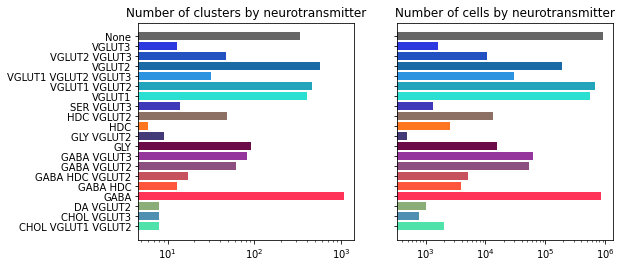

In [14]:
bar_plot_by_level_and_type(term_with_counts, 'neurotransmitter')

#### Supercluster level cluster and cell counts
Supercluster "Splatter" contains the largest number of subclusters (~1k), while "Oligodendrocyte" and "Upper-layer intratelencephalic" have the most cells.

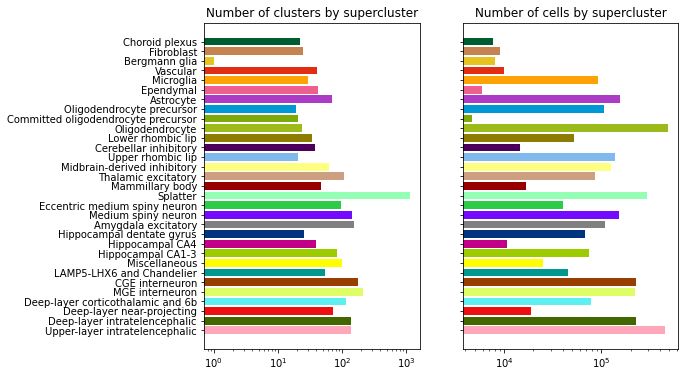

In [15]:
bar_plot_by_level_and_type(term_with_counts, 'supercluster', 8.5, 6)

### Visualizing cluster and term distributions

We can explore the relationship and distribution of clusters between term sets by creating a pivot table using pandas groupby fuunction. Each row of the resulting dataframe represents a cluster, each column represents a term set and the value in the table is the name of the term that has been associated with the cluster for that specific term set.

In [16]:
pivot = membership.groupby(['cluster_alias', 'cluster_annotation_term_set_name'])['cluster_annotation_term_name'].first().unstack()
pivot = pivot[term_set['name']] # order columns
pivot

cluster_annotation_term_set_name,subcluster,cluster,supercluster,neurotransmitter
cluster_alias,,,,
0,URL_297_0,URL_297,Upper rhombic lip,VGLUT1
1,URL_308_1,URL_308,Upper rhombic lip,VGLUT1
2,URL_308_2,URL_308,Upper rhombic lip,VGLUT1
3,URL_308_3,URL_308,Upper rhombic lip,VGLUT1
4,URL_308_4,URL_308,Upper rhombic lip,VGLUT1
...,...,...,...,...
3308,Nkcell_2_3308,Nkcell_2,Miscellaneous,None
3309,Nkcell_2_3309,Nkcell_2,Miscellaneous,None
3310,Nkcell_2_3310,Nkcell_2,Miscellaneous,None


We can also obtain a cluster annotation color pivot table in the same way.

In [17]:
color = membership.groupby(['cluster_alias', 'cluster_annotation_term_set_name'])['color_hex_triplet'].first().unstack().fillna('#f9f9f9')
color = color[term_set['name']] # order columns
color.columns = ['%s_color' % x for x in color.columns]
color

,subcluster_color,cluster_color,supercluster_color,neurotransmitter_color
cluster_alias,,,,
0,#7E807A,#909FF6,#80BAED,#2BDFD1
1,#C54945,#A5B0D9,#80BAED,#2BDFD1
2,#5232B7,#A5B0D9,#80BAED,#2BDFD1
3,#31BEBA,#A5B0D9,#80BAED,#2BDFD1
4,#C8A9BC,#A5B0D9,#80BAED,#2BDFD1
...,...,...,...,...
3308,#3D84BA,#E2EE30,#FEFE00,#666666
3309,#C25347,#E2EE30,#FEFE00,#666666
3310,#B9BFB4,#E2EE30,#FEFE00,#666666


For a given pair of term sets A and B, define a function *distribution* that creates a cluster count table where the rows are terms in term set A, columns are terms in term set B and the table values being the number of clusters that is shared between the terms. 

In [18]:
def distribution(A, B):
    
    AxB = pivot.groupby([A, B])[['cluster']].count()
    AxB.columns = ['number_of_clusters']
    AxB = AxB.unstack().fillna(0)

    B_names = [x[1] for x in list(AxB.columns)]
    pred = (term['cluster_annotation_term_set_name'] == B)
    term_by_name = term[pred].set_index('name')
    B_colors = term_by_name.loc[B_names, 'color_hex_triplet']
    
    return AxB, B_names, B_colors

Function *stacked_bar_distribution* takes the results of *distribution* as input to create distribution stacked bar plot.


In [19]:
def stacked_bar_distribution(AxB, B_names, B_colors, fig_width = 6, fig_height = 6):

    fig, ax = plt.subplots()
    fig.set_size_inches(fig_width, fig_height)

    bottom = np.zeros(len(AxB))

    for i, col in enumerate(AxB.columns):
        ax.barh(AxB.index, AxB[col], left=bottom, label=col[1], color=B_colors[i])
        bottom += np.array(AxB[col])

    ax.set_title('Distribution of %s in each %s' % (AxB.columns.names[1], AxB.index.name))
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()
    
    return fig, ax

#### Distribution of neurotransmitter clusters in each class

At the next level of classification, around 50% of the classes are have a single neurotransmitter identity and remaining 50% are of mixed types.

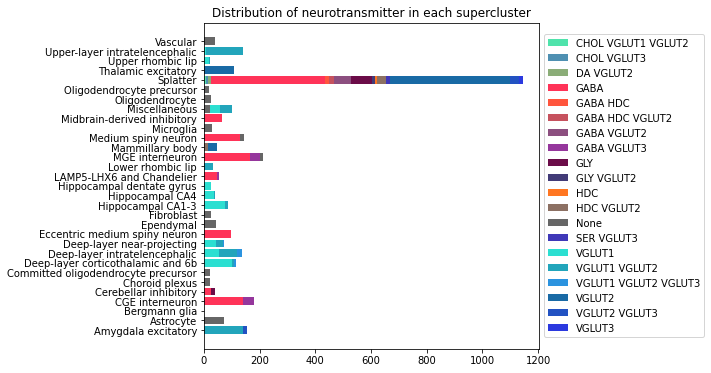

In [20]:
AxB, B_names, B_colors = distribution('supercluster', 'neurotransmitter')
fig, ax = stacked_bar_distribution(AxB, B_names, B_colors, 6, 6)

### Visualizing the human whole brain taxonomy

Term sets: supercluster, cluster, and subcluster forms a three level human whole brain taxonomy. We can visualized the taxonomy as a sunburst diagram that shows the single inheritance hierarchy through a series of rings, that are sliced for each annotation term. Each ring corresponds to a level in the hierarchy. We have ordered the rings so that the supercluster level is the outer most ring so that we can add in labels. Rings are sliced up and divided based on their hierarchical relationship to the parent slice. The angle of each slice is proportional to the number of clusters belonging to the term.

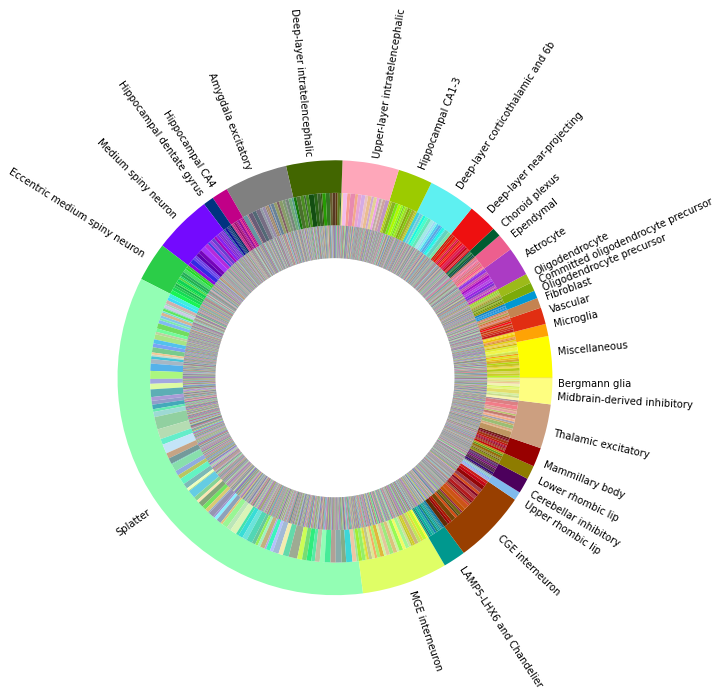

In [21]:
levels = ['supercluster', 'cluster', 'subcluster']
df = {}

for lvl in levels :
    pred = term_with_counts['cluster_annotation_term_set_name'] == lvl
    df[lvl] = term_with_counts[pred]
    df[lvl] = df[lvl].sort_values(['parent_term_label', 'label'])

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
size = 0.15

for i, lvl in enumerate(levels):
    
    if lvl == 'supercluster' :
        ax.pie(df[lvl]['number_of_clusters'],
               colors=df[lvl]['color_hex_triplet'],
               labels = df[lvl]['name'],
               rotatelabels=True,
               labeldistance=1.025,
               radius=1,
               wedgeprops=dict(width=size, edgecolor=None),
               startangle=0)
    else :
        ax.pie(df[lvl]['number_of_clusters'],
               colors=df[lvl]['color_hex_triplet'],
               radius=1-i*size,
               wedgeprops=dict(width=size, edgecolor=None),
               startangle=0)

plt.show()